### Challenge data analysis
1. reading data
   
2. EDA
   2.1 Understanding data set
   2.2 Checking missing value
   2.3 checking outliers
   2.4 feature engineering
   2.5 data preprocessing

3. Modeling 
   
   3.1 Traditional methods --> Smoothing, ARIMA (VARIMA)
   
   3.2 ML based methods --> ML or DL methods (preferably LSTM or GRU)
4. Forecasting
5. Evaluation --> Metrics like MSE, RMSE, MAP
6. Models comparison 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as xp
import seaborn as sn

import warnings
warnings.filterwarnings("ignore")
%load_ext autoreload 
%autoreload 2


In [2]:
data = pd.read_csv("../data/external/train.csv")
data['datum'] = pd.to_datetime(data.datum)
data.set_index("datum", inplace= True)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 670 entries, 2018-02-01 to 2019-12-02
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   vkmge      670 non-null    int64  
 1   a          670 non-null    int64  
 2   b          372 non-null    float64
 3   c          372 non-null    float64
 4   d          372 non-null    float64
 5   e          372 non-null    float64
 6   f          372 non-null    float64
 7   g          372 non-null    float64
 8   h          372 non-null    float64
 9   i          372 non-null    float64
 10  sk         372 non-null    float64
 11  zp         372 non-null    float64
 12  inout_IO   372 non-null    float64
 13  inout_SO   372 non-null    float64
 14  ausw_cd_A  372 non-null    float64
 15  ausw_cd_G  372 non-null    float64
 16  ausw_cd_W  372 non-null    float64
 17  am         372 non-null    float64
 18  fm         0 non-null      float64
 19  akt_vkp    345 non-null    floa

In [4]:
## Plotting the target variable


fig1 = go.Figure()
fig2 = go.Figure()
fig1.add_trace(go.Scatter(x=data.index.tolist(), y=data["vkmge"], mode = "lines" ,name = "Sales"))
fig2.add_trace(go.Scatter(x=data.index.tolist(), y=data["a"], mode = "lines" ,name = "Sales"))

fig1.update_layout(title='Time Series Data : vkp_mge', xaxis_title='Date', yaxis_title='sales quantity')
fig2.update_layout(title = 'Time_Series_Data : a', xaxis_title = 'Date', yaxis_title = "A")
fig1.show()
fig2.show()

## Seasonality Analysis
Lets do some seasonal analysis, try to find patterns in the time series by grouping day by month or days of week.

In [5]:
## Defining Date Features
data_season = data.copy(deep=True)
data_season["year"] = data.index.year
data_season["month"] = data.index.month
data_season["week_day"] = data.index.weekday
data_season["weekday_name"] = data_season.index.day_name()
data_season["quarter"] = data_season.index.quarter




## "vk_mge" Seasonality Analysis

In [6]:
def vis_monthly(data_season,feat):
    vk_month = data_season.groupby("month")[feat].mean()
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=vk_month.index, y=vk_month.values, mode = "lines" ,name = "Monthly Sales"))
    fig.update_layout(title=f'Monthly Time Series Visualization : {feat}', xaxis_title='Month', yaxis_title='sales quantity')
    fig.show()
vis_monthly(data_season, "vkmge")


### Analysis Results:
We can see that the amount of sales is increased and by month and then starts decreasing from August.

In [7]:
def vis_year_month(data_season, feat):
    vk_year_month = pd.DataFrame(data_season.groupby(["month","year"])[feat].mean()).reset_index()
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=vk_year_month[vk_year_month["year"]==2018].month, y=vk_year_month[vk_year_month["year"]==2018]\
        [feat], mode = "lines" ,name = "Monthly Sales 2018"))
    fig.add_trace(go.Scatter(x=vk_year_month[vk_year_month["year"]==2019].month, y=vk_year_month[vk_year_month["year"]==2019]\
        [feat], mode = "lines" ,name = "Monthly Sales 2019"))
    fig.update_layout(title=f'Monthly Time Series Visualization : {feat}', xaxis_title='Month', yaxis_title='sales quantity')
    fig.show()
vis_year_month(data_season,"vkmge")

### Analysis Results:
We can see that approximately there is similar monthly pattern for both years.

In [8]:
def vis_box_month(data_season, feat):
    fig = xp.box(data_season, y=feat, x="month", title= f"Box Plot {feat} : Monthly Sales")
    fig.show()
vis_box_month(data_season,"vkmge")

### Analysis Results:
Sales has the most range in July, it seems that there are some outliers in May and Jun, as mentioned before it seems that the Sales is less in Winter and Fall.

In [9]:
## Grouping by days of week
def vis_week_day(data_season,feat):
    data_season['weekday_name'] = pd.Categorical(data_season['weekday_name'],\
        categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)
    vk_weekday = data_season.groupby("weekday_name")[feat].mean()

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=vk_weekday.index, y=vk_weekday.values, mode = "lines" ,name = "Daily Sales"))
    fig.update_layout(title=f'Daily Time Series Visualization : {feat}', xaxis_title='Week days', yaxis_title='sales quantity')
    fig.show()
vis_week_day(data_season, "vkmge")

### Analysis Results:
We can see the sales quantity is gradually increased from Mon - Fri 

In [10]:
def vis_quarter_w_day(data_season,feat):
    vk_quarter_day_week = pd.DataFrame(data_season.groupby(["quarter","weekday_name"])[feat].mean()).reset_index()
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=vk_quarter_day_week[vk_quarter_day_week["quarter"]==1].\
        weekday_name, y=vk_quarter_day_week[vk_quarter_day_week["quarter"]==1]\
        [feat], mode = "lines" ,name = "Quarter 1"))
    fig.add_trace(go.Scatter(x=vk_quarter_day_week[vk_quarter_day_week["quarter"]==2].\
        weekday_name, y=vk_quarter_day_week[vk_quarter_day_week["quarter"]==2]\
        [feat], mode = "lines" ,name = "Quarter 2"))
    fig.add_trace(go.Scatter(x=vk_quarter_day_week[vk_quarter_day_week["quarter"]==3].\
        weekday_name, y=vk_quarter_day_week[vk_quarter_day_week["quarter"]==3]\
        [feat], mode = "lines" ,name = "Quarter 3"))
    fig.add_trace(go.Scatter(x=vk_quarter_day_week[vk_quarter_day_week["quarter"]==4].\
        weekday_name, y=vk_quarter_day_week[vk_quarter_day_week["quarter"]==4]\
        [feat], mode = "lines" ,name = "Quarter 4"))
    fig.update_layout(title=f'Weekday_Quarter Time Series Visualization : {feat}', xaxis_title='Week_Day', yaxis_title='sales quantity')
    fig.show()
vis_quarter_w_day(data_season,"vkmge")

### Analysis Results:
More or less the week day sales pattern is approximately repeating in different quarters, the average amount of sales is more in the 2nd and 3rd quarters.


In [11]:
### Box Plot for Quarter Analysis
def vis_box_quarter(data_season, feat):
    fig = xp.box(data_season, y=feat, x="quarter", title=f"Box Plot {feat} : Quarter Sales")
    fig.show()
vis_box_quarter(data_season,"vkmge")

### Analysis Results:
As we expected the median of the sales are higher in the 2nd and 3rd quarters. In the second quarter we are observing more outliers than other quarters.

## "a" TimeSeries Seasonality Analysis

In [12]:
vis_monthly(data_season, "a")


### Analysis Results:
We can see that the amount of "a" like "vkmge" is increased and by month and then starts decreasing from July.

In [13]:
vis_year_month(data_season,"a")

### Analysis Results:
This feature has a completely different treatment in 2018 and 2019.

In [14]:
vis_box_month(data_season,"a")

### Analysis Results:
There is a fluctuation treatment for "a" features in a year (different month). There is no specific outliers and their variation (range) are fluctuating and I can not see any specific pattern in it.

In [15]:
## Grouping by days of week
vis_week_day(data_season, "a")

### Analysis Results:
The pattern of the week day values of the "a" time series is similar to "vkmge"

In [16]:
vis_quarter_w_day(data_season,"a")

### Analysis Results:
The above plot shows the 1st and 3rd quarters have more similar values but the 2nd and 4th quarters values differ more severely. I can see that the general treatment of "a" value for each quarter is similar to by increasing from the beginning of the week.

In [17]:
### Box Plot for Quarter Analysis
vis_box_quarter(data_season,"a")

### Analysis Results:
The median of the "a" is as I expected for each quarter, we can see that there is not any outlier for each quarter.

## Other Features Analysis
There are some features that have a constant values or does not have any value which can be useful for the modeling and forecasting. 

In [18]:
def bad_feats_rmv(feats:list,bad_feats:list):
    '''This function remove bad features'''
    for col in bad_feats:
        feats.remove(col)        
    return feats

In [19]:
### Plot each feature
feats = data.columns.to_list()#[1::]
bad_feats = ['param1','fm','son_vkp','sh','inout_IO','inout_SO']
feats = bad_feats_rmv(feats, bad_feats)
exogenous_vars = feats[1::]
for col in exogenous_vars:
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data.index.tolist(), y=data[col], mode = "lines" ,name = col))
    fig.update_layout(title=f'Exogenous Time Series Data {col}', xaxis_title='Date', yaxis_title='Value')
    fig.show()
    

### Analysis Results:
Some of these features are binary flags that have 0 or 1 values. These flags can have some information about the store, days of the week, holidays even weather condition. Moreover, some features are one hot encoded values for categorical features. And finally some features have discrete float values like "vkp" features which act as categorical features. These features are acting as exogenous variables that provide some information that can be used in the modeling in order to increase the accuracy of the sale forecast.


## Missing data analysis


In [20]:
### Checking missing values:
round(data.isna().sum()/data.shape[0],2) * 100

vkmge          0.0
a              0.0
b             44.0
c             44.0
d             44.0
e             44.0
f             44.0
g             44.0
h             44.0
i             44.0
sk            44.0
zp            44.0
inout_IO      44.0
inout_SO      44.0
ausw_cd_A     44.0
ausw_cd_G     44.0
ausw_cd_W     44.0
am            44.0
fm           100.0
akt_vkp       49.0
param1       100.0
lt             0.0
sh             0.0
sys_vkp        0.0
son_vkp        0.0
dtype: float64

### Imputation Strategy
I am going to use "missing indicator imputation" method for handling missing values of exogenous variables by adding a new binary flag to indicate missing features. 


In [21]:
onehot_encoded = pd.get_dummies(data["lt"]).astype(int)
data = pd.concat([data, onehot_encoded], axis =1)
data.drop("lt",axis=1, inplace =True)
feats = feats + ["A", "N"]
feats.remove("lt")


In [22]:
def missing_indication_imputation(data,feats):
    '''This function imputes the missing values by creating new binary feat for them and impute missing values by 0'''
    data_training = data[feats]
    missing_exo_feats = feats[2:-3]
    data_training["is_exo_missed"] = data_training[missing_exo_feats].\
        isna().iloc[:,0].values.astype(int)
    data_training[missing_exo_feats] = data_training[missing_exo_feats].fillna(0)
    data_training["is_akt_vkp_missed"] = data_training["akt_vkp"].\
        isna().values.astype(int)
    data_training["akt_vkp"] = data_training["akt_vkp"].fillna(0)
    return data_training
feats
data_training = missing_indication_imputation(data,feats)


### Time Series Characterestics Anlaysis
I want to check the vkp_mge time series characterestics from Being Stationary point of view and checking Trend, seasonality and residule if exists by decomposing it.

In [23]:
### Checking Stationary 
from statsmodels.tsa.stattools import adfuller
def checking_stationary(ts:list,ts_name:str)->bool:
    '''This function runs adfuller test for checking if a timeserie is stationary or not!!'''
    result = adfuller(ts)
    p_value = result[1]
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'{key}: {value}')
    if p_value < 0.05:
        print(f"The TimeSerie {ts_name} is Stationary!!")
        return True
    else:
        print(f"The timeserie {ts_name} is not stationary!!")
        return False
    
vk_mge_is_stationary = checking_stationary(data["vkmge"],"vkmge")
a_is_stationay = checking_stationary(data["a"],"a")

ADF Statistic: -7.199252062759944
p-value: 2.3892786455516855e-10
Critical Values:
1%: -3.4402516575519346
5%: -2.8659091963995573
10%: -2.569096752341498
The TimeSerie vkmge is Stationary!!
ADF Statistic: -4.048564227924028
p-value: 0.0011765106366816663
Critical Values:
1%: -3.4401920464204667
5%: -2.865882935271461
10%: -2.569082760711099
The TimeSerie a is Stationary!!


In [24]:
## Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

def ts_seasonal_decompose(ts:pd.DataFrame, ts_name:str):
    '''This function decompose a time series into trend, seasonal and residual components in additive form'''
    ts_decompose = seasonal_decompose(ts, model='additive')
    ts_trend = ts_decompose.trend
    ts_season = ts_decompose.seasonal
    ts_res = ts_decompose.resid
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=ts_trend.index.tolist(), y=ts_trend, mode = "lines" ,name = "Trend"))
    fig.update_layout(title=f'Time Series Data decomposition-Trend: {ts_name}', \
        xaxis_title='Date', yaxis_title='Decomposed Elements')
    fig.show()
    fig = go.Figure()
    fig.add_trace(go.Scatter(x= ts_season.index.tolist(), y=ts_season, mode = "lines" ,name = "Seasonal"))
    fig.update_layout(title=f'Time Series Data decomposition-Seasonality: {ts_name}', \
        xaxis_title='Date', yaxis_title='Decomposed Elements')
    fig.show()
    fig = go.Figure()
    fig.add_trace(go.Scatter(x= ts_season.index.tolist(), y = ts_res, mode = "lines" , name = "Residual"))
    fig.update_layout(title=f'Time Series Data decomposition-Residual: {ts_name}', \
        xaxis_title='Date', yaxis_title='Decomposed Elements')
    fig.show()
    return ts_trend, ts_season, ts_res

vkmge_trend, vkmge_seasonal, vkmge_res = ts_seasonal_decompose(data["vkmge"],"vkmge")    
a_trend, a_seasonal, a_res = ts_seasonal_decompose(data["a"],"a")    

    

#### Analysis Result:
I can see seasonality for both time series.


### Checking the correlation relation of features. 

In [25]:
print(data.corr()["vkmge"])

vkmge        1.000000
a            0.166249
b            0.086515
c                 NaN
d            0.107654
e            0.123456
f                 NaN
g            0.439834
h                 NaN
i                 NaN
sk           0.439834
zp          -0.239127
inout_IO          NaN
inout_SO          NaN
ausw_cd_A    0.086515
ausw_cd_G         NaN
ausw_cd_W   -0.086515
am           0.070097
fm                NaN
akt_vkp      0.133148
param1            NaN
sh                NaN
sys_vkp      0.107676
son_vkp           NaN
A            0.272014
N           -0.272014
Name: vkmge, dtype: float64


### Analysis Results:
There is not high correlation between "vkmge" and "a". 

### Checking if the second time series has effect on target timeserie or not.

In [26]:
from statsmodels.tsa.stattools import grangercausalitytests

def grag_test(data:pd.DataFrame, max_lag:int):
    '''This function runs the grangercausality test to check the causal relation between multi time series'''
    grag_result = grangercausalitytests(data,maxlag=max_lag)
    # for lag in range(1,max_lag + 1):
    #     print(f"The lag {lag} : {grag_result[lag]}")
        
    return grag_result

In [27]:
gag_test = grag_test(data[["vkmge","a"]],max_lag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=23.1247 , p=0.0000  , df_denom=666, df_num=1
ssr based chi2 test:   chi2=23.2289 , p=0.0000  , df=1
likelihood ratio test: chi2=22.8347 , p=0.0000  , df=1
parameter F test:         F=23.1247 , p=0.0000  , df_denom=666, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=14.7960 , p=0.0000  , df_denom=663, df_num=2
ssr based chi2 test:   chi2=29.8152 , p=0.0000  , df=2
likelihood ratio test: chi2=29.1690 , p=0.0000  , df=2
parameter F test:         F=14.7960 , p=0.0000  , df_denom=663, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=10.3423 , p=0.0000  , df_denom=660, df_num=3
ssr based chi2 test:   chi2=31.3561 , p=0.0000  , df=3
likelihood ratio test: chi2=30.6413 , p=0.0000  , df=3
parameter F test:         F=10.3423 , p=0.0000  , df_denom=660, df_num=3


### Analyzing Results:
this is checking if "a" causes "vkmge" or not for 3 lags. We should check the p-value of "ssr based F test" which is around 0.0 here. So the results show that there is some evidence that "a" can cause "vkmge". By doing this test we can conclude that its a good idea to use "a" time series for forecasting "vkmge". 

## Modeling for Forecast

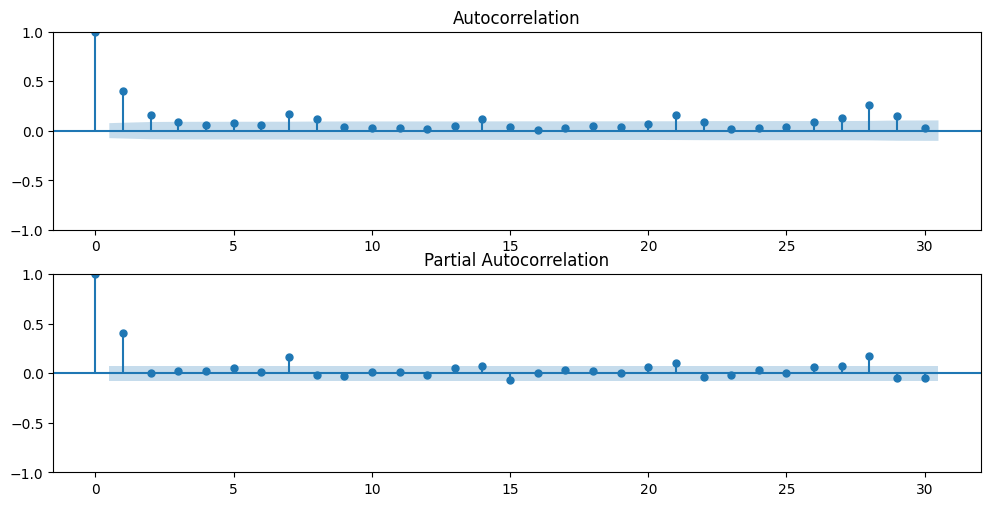

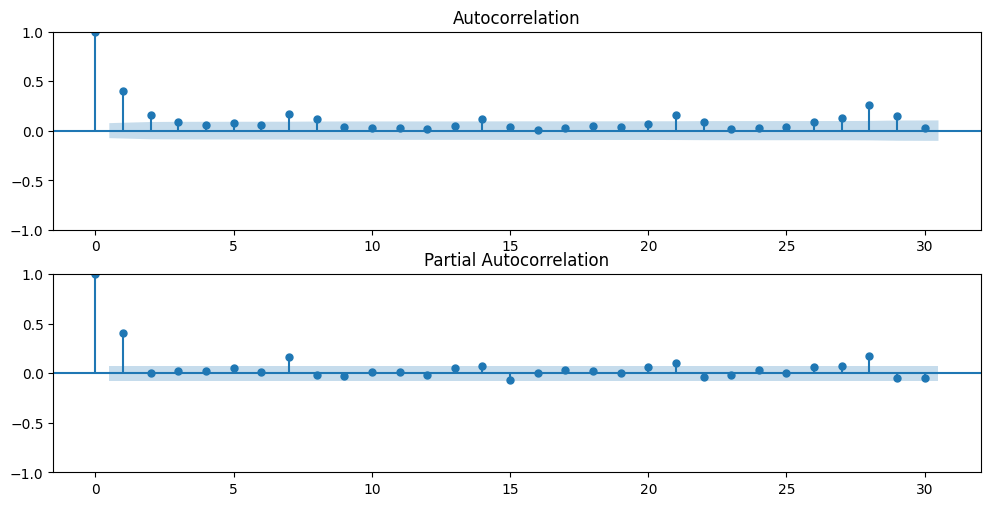

In [28]:
import statsmodels.api as sm
fig, axs = plt.subplots(2,figsize=(10,5))
fig.tight_layout()
sm.graphics.tsa.plot_acf(data_training["vkmge"], lags=30, ax = axs[0])
sm.graphics.tsa.plot_pacf(data_training["vkmge"], lags=30, ax = axs[1])

### Modeling with Classical Models

In [29]:
## Useful function
def performance_eval(y_true:list, y_pred:list): 
    '''this function calculates the performance metrics'''
    mse = ((y_pred - y_true) ** 2).mean()
    
    #mape= np.mean(np.abs((y_true - y_pred) / (y_true))) * 100
    mape = np.mean([np.abs(yt - yp)/yt for yt,yp in zip(y_true,y_pred) if yt != 0])
    performance_data= {'MSE':round(mse, 2),
                      'RMSE':round(np.sqrt(mse), 2),
                       'MAPE':round(mape, 2)
                      }
    return performance_data

def vis_model_eval(test_ts:pd.DataFrame, forecast_df:pd.DataFrame):
    plt.figure(figsize=(10, 6))
    plt.plot(test_ts.index, test_ts['vkmge'], label='Actual vkmge', color='blue')
    plt.plot(forecast_df.index, forecast_df['vkmge'], label='Forecasted vkmge', linestyle='--', color='red')
    plt.title('Forecasted vkmge vs Actual vkmge')
    plt.xlabel('Date')
    plt.ylabel('vkmge')
    plt.legend()
    plt.grid(True)
    plt.show()

### Univariate Forecasting with ARIMA method.

/home/koosha/koosha/ds-repo/Projects/REWE_Challenge/REWE_Challenge/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/home/koosha/koosha/ds-repo/Projects/REWE_Challenge/REWE_Challenge/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/home/koosha/koosha/ds-repo/Projects/REWE_Challenge/REWE_Challenge/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Evaluation Result: {'MSE': 4349.24, 'RMSE': 65.95, 'MAPE': 3.72}


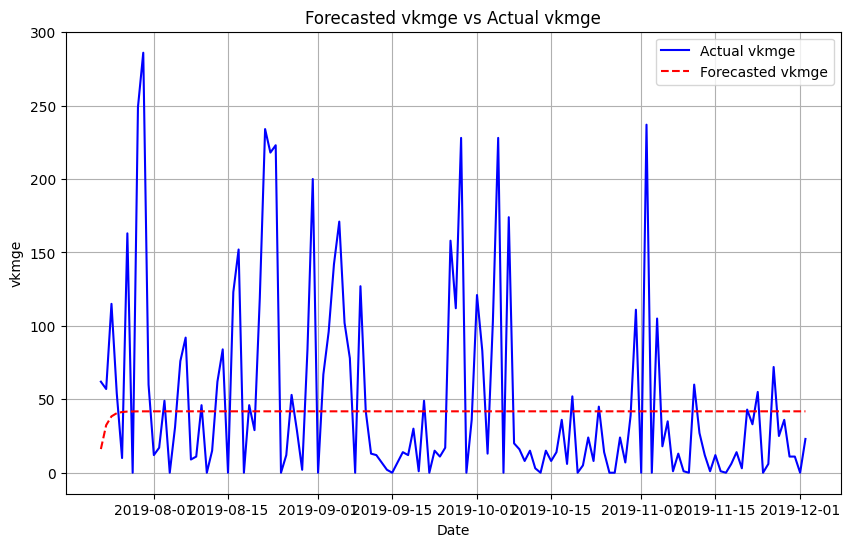

In [30]:
from statsmodels.tsa.arima.model import ARIMA

p = 1  
d = 0  
q = 1 

# Split data into train and test sets
train_size = int(0.8 * len(data_training))
train_data = data_training.iloc[:train_size]
test_data = data_training.iloc[train_size:]



# Fit ARIMA model
model = ARIMA(train_data['vkmge'], order=(p, d, q))
#model = ARIMA(train_ts['vkmge'], order = (p,d,q))
model_fit = model.fit()

# Forecast with ARIMA model
forecast = model_fit.forecast(steps=len(test_data))
#forecast_ = model_fit.predict(start = test_data.index[0], end = test_data.index[-1] )

# Extract forecasted sales
forecasted_sales = forecast.values
forecast_df = pd.DataFrame(forecasted_sales, index=test_data.index, columns=["vkmge"])

# Calculate Mean Squared Error (MSE)
#mse = mean_squared_error(test_data['vkmge'], forecasted_sales)
perform_eval = performance_eval(test_data["vkmge"].values, forecasted_sales)
print("Evaluation Result:", perform_eval)
vis_model_eval(test_data, forecast_df)

### Adding seasonal orders by using sarimax

/home/koosha/koosha/ds-repo/Projects/REWE_Challenge/REWE_Challenge/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/home/koosha/koosha/ds-repo/Projects/REWE_Challenge/REWE_Challenge/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.91673D+00    |proj g|=  1.63233D-02

At iterate    5    f=  5.91618D+00    |proj g|=  3.65181D-03

At iterate   10    f=  5.91145D+00    |proj g|=  2.05084D-02

At iterate   15    f=  5.90238D+00    |proj g|=  9.79314D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     23      1     0     0   1.681D-06   5.902D+00
  F =   5.9023742527523790     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Evaluati

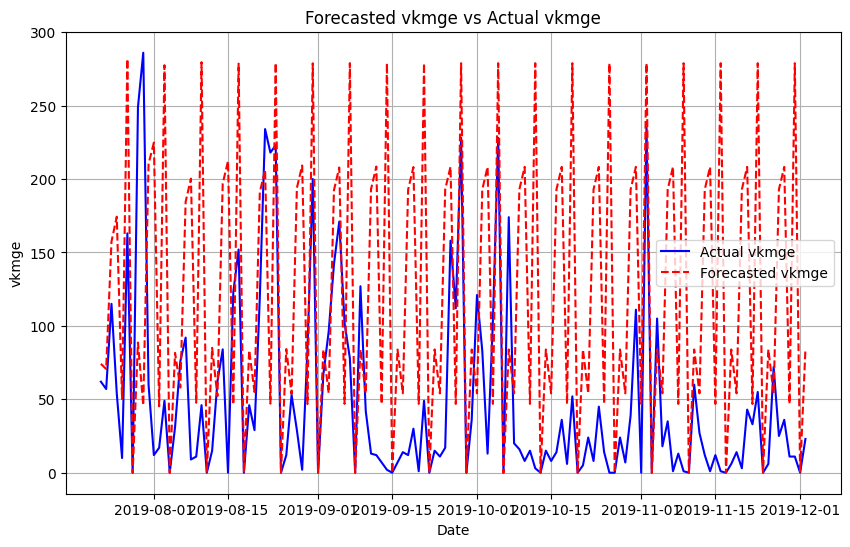

In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p = 1  
d = 0  
q = 1 

P = 1
D = 0
Q = 1
S = 7
# Split data into train and test sets
train_size = int(0.8 * len(data_training))
train_data = data_training.iloc[:train_size]
test_data = data_training.iloc[train_size:]

# Fit SARIMA model
model = SARIMAX(train_data['vkmge'], order=(p, d, q), seasonal_order=(P,Q,D,S))
model_fit = model.fit()

# Forecast with SARIMA model
forecast = model_fit.forecast(steps=len(test_data))

# Extract forecasted sales
forecasted_sales = forecast.values
forecast_df = pd.DataFrame(forecasted_sales, index=test_data.index, columns=["vkmge"])

# Calculate Mean Squared Error (MSE)
# mse = mean_squared_error(test_data['vkmge'], forecasted_sales)
perform_eval = performance_eval(test_data["vkmge"].values, forecasted_sales)
print("Evaluation Result:", perform_eval)
vis_model_eval(test_data, forecast_df)


/home/koosha/koosha/ds-repo/Projects/REWE_Challenge/REWE_Challenge/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/home/koosha/koosha/ds-repo/Projects/REWE_Challenge/REWE_Challenge/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           23     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.52785D+00    |proj g|=  1.64440D-02


 This problem is unconstrained.



At iterate    5    f=  5.52591D+00    |proj g|=  1.16047D-02

At iterate   10    f=  5.52569D+00    |proj g|=  6.58097D-03

At iterate   15    f=  5.52516D+00    |proj g|=  4.96580D-03

At iterate   20    f=  5.52513D+00    |proj g|=  1.29232D-04

At iterate   25    f=  5.52501D+00    |proj g|=  2.96572D-03

At iterate   30    f=  5.52490D+00    |proj g|=  1.77482D-04

At iterate   35    f=  5.52490D+00    |proj g|=  8.07491D-05

At iterate   40    f=  5.52489D+00    |proj g|=  3.17736D-04

At iterate   45    f=  5.52487D+00    |proj g|=  5.43580D-04

At iterate   50    f=  5.52487D+00    |proj g|=  4.37942D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/koosha/koosha/ds-repo/Projects/REWE_Challenge/REWE_Challenge/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Evaluation Result: {'MSE': 3754.38, 'RMSE': 61.27, 'MAPE': 3.32}


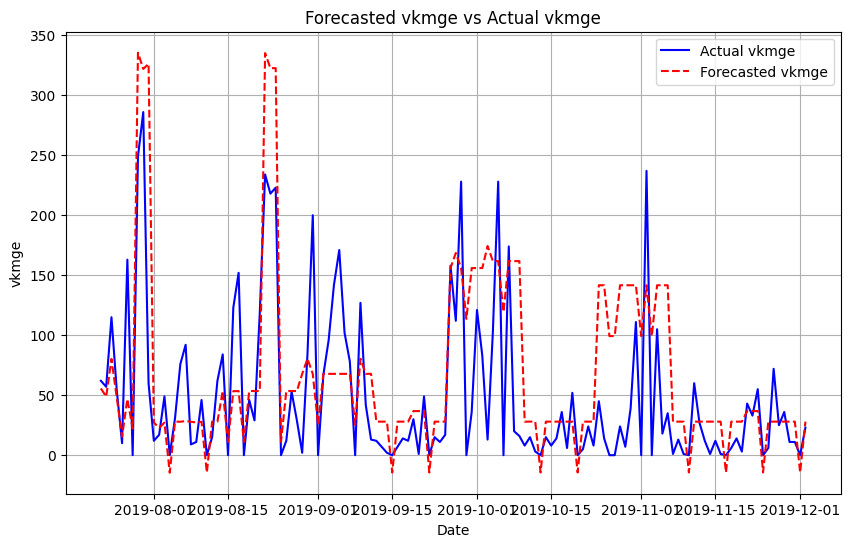

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p = 1  
d = 0  
q = 1

P = 1
D = 0
Q = 0
S = 7
# Split data into train and test sets
train_size = int(0.8 * len(data_training))
train_data = data_training.iloc[:train_size]
test_data = data_training.iloc[train_size:]
#####
exogenous_feats = train_data.columns.tolist()[2:] ## categorical and binary variables as exogenous variables
#exogenous_feats.remove("am")
#exogenous_feats.remove("sys_vkp")
#exogenous_feats.remove("akt_vkp")
#exogenous_feats.remove("A")
exogenous_feats.remove("N")



ts_feats = train_data.columns.tolist()[0:2] ### vkmge and a as time series 
train_ts = train_data[ts_feats]
test_ts = test_data[ts_feats]
train_exo = train_data[exogenous_feats]
test_exo = test_data[exogenous_feats]

# Fit SARIMA model
model = SARIMAX(endog = train_data['vkmge'], order=(p, d, q), seasonal_order=(P,Q,D,S),exog = train_exo)
model_fit = model.fit()

# Forecast with SARIMA model
forecast = model_fit.forecast(steps=len(test_data), exog = test_exo)

# Extract forecasted sales
forecasted_sales = forecast.values
forecast_df = pd.DataFrame(forecasted_sales, index=test_data.index, columns=["vkmge"])

# Calculate Mean Squared Error (MSE)
# mse = mean_squared_error(test_data['vkmge'], forecasted_sales)
perform_eval = performance_eval(test_data["vkmge"].values, forecasted_sales)
print("Evaluation Result:", perform_eval)
vis_model_eval(test_data, forecast_df)

### Multivariate Time series forecasting with VARMAX

/home/koosha/koosha/ds-repo/Projects/REWE_Challenge/REWE_Challenge/.venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning:

Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.

/home/koosha/koosha/ds-repo/Projects/REWE_Challenge/REWE_Challenge/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           49     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22192D+01    |proj g|=  1.94920D-01


 This problem is unconstrained.



At iterate    5    f=  1.21860D+01    |proj g|=  2.42433D-02

At iterate   10    f=  1.21833D+01    |proj g|=  8.12100D-03

At iterate   15    f=  1.21820D+01    |proj g|=  1.92371D-02

At iterate   20    f=  1.21816D+01    |proj g|=  5.70253D-03

At iterate   25    f=  1.21812D+01    |proj g|=  1.23873D-02

At iterate   30    f=  1.21799D+01    |proj g|=  1.64038D-02

At iterate   35    f=  1.21767D+01    |proj g|=  2.49916D-02

At iterate   40    f=  1.21748D+01    |proj g|=  1.10103D-02

At iterate   45    f=  1.21735D+01    |proj g|=  3.43643D-02


/home/koosha/koosha/ds-repo/Projects/REWE_Challenge/REWE_Challenge/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  1.21682D+01    |proj g|=  2.45857D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   49     50     57      1     0     0   2.459D-02   1.217D+01
  F =   12.168193438751146     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/home/koosha/koosha/ds-repo/Projects/REWE_Challenge/REWE_Challenge/.venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning:

Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.

/home/koosha/koosha/ds-repo/Projects/REWE_Challenge/REWE_Challenge/.venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning:

Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.



Evaluation Result: {'MSE': 2614.25, 'RMSE': 51.13, 'MAPE': 2.38}


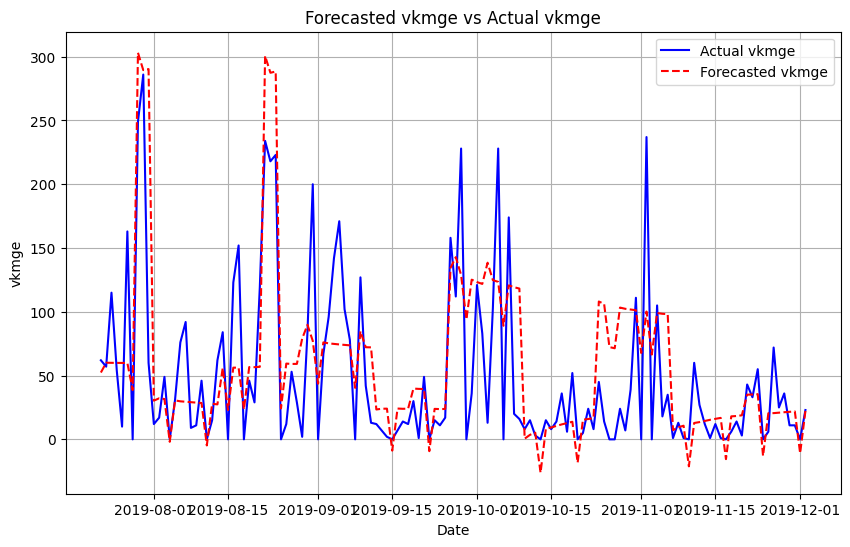

In [33]:
from statsmodels.tsa.statespace.varmax import VARMAX
p = 1  
d = 0  
q = 1 

P = 1
D = 0
Q = 1
S = 7
# Split data into train and test sets
train_size = int(0.8 * len(data_training))
train_data = data_training.iloc[:train_size]
test_data = data_training.iloc[train_size:]
#####
exogenous_feats = train_data.columns.tolist()[2:] ## categorical and binary variables as exogenous variables
#exogenous_feats.remove("am")
#exogenous_feats.remove("sys_vkp")
#exogenous_feats.remove("akt_vkp")
exogenous_feats.remove("A")
#exogenous_feats.remove("N")



ts_feats = train_data.columns.tolist()[0:2] ### vkmge and a as time series 
train_ts = train_data[ts_feats]
test_ts = test_data[ts_feats]
train_exo = train_data[exogenous_feats]
test_exo = test_data[exogenous_feats]
train_ts = train_ts.astype('float64')
train_exo = train_exo.astype('float64')
# Fit SARIMA model
model = VARMAX(endog=train_ts, exog=train_exo, order=(p,q) ,seasonal_order=(P,Q,S) ,trend='n')
model_fit = model.fit()

# Forecast with SARIMA model
forecast = model_fit.forecast(steps=len(test_data), exog = test_exo)
perform_eval = performance_eval(test_data["vkmge"].values, forecast["vkmge"])
print("Evaluation Result:", perform_eval)
vis_model_eval(test_data, forecast)

### Analysis Result:
4 classical models are trained and evaluated:
1. univariate forecast by ARIMA:in this case I tried to forecast vkmge as an univariate time series and results shows the trained model can is too simple to track the target value.
2. univariate forecast by SARIMA: in this case the seasonality is considered by adding seasonal order. we can see the forecast values are flactuating but the error is increased.
3. univariate forecast with exogenous variables by SARIMA: In this case I trained a sarimax model by considering seasonality and adding exogenous variables makes it a bit better.
4. Multivariate forecast with exogenous variables by VARMAX: in this model time series "a" and exogenous variables are considered all together and in comparison with the previous metho from validation metrics we can see both "rmse" and "mape" both are decreased. However generaly non of the models do not work very well but we can see that adding exogenous variables and second time series make increase the accuracy.   
The main issue about the forecasted values is related to the cases that are forecasted as negative. I can add a postprocess function that checks if any negative values are predicted changed to 0 or if the N flag was set make the forecast as 0.

## Using Machine Learning model 

Here I am going to check if Machine Learning approach works better or not. I want to train a XGBoost as a very powerfull Ensemble model.

Evaluation Result: {'MSE': 2803.67, 'RMSE': 52.95, 'MAPE': 4.61}


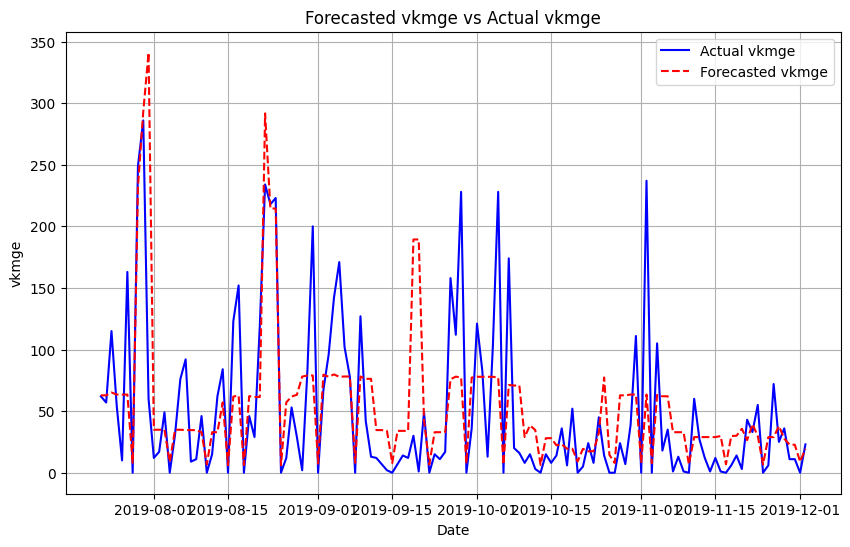

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=85, ...)

In [66]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data_ml = data_training.copy(deep = True)
# Define the seasonality --> based on the time series decompostion results the seasonlity period is 7 days.
sequence_length = 7
data_ml.drop("A",axis= 1, inplace=True)

# Create lagged time series as ml features
for i in range(1, sequence_length + 1):
    #data_ml[f'lag_{i}'] = data_ml['vkmge'].shift(i) -> data leakage
    data_ml[f'lag_a{i}'] = data_ml['a'].shift(i)

data.dropna(inplace=True)
# Train-test split
train_size = int(0.8 * len(data_ml))
train_data = data_ml.iloc[:train_size]
test_data = data_ml.iloc[train_size:]

# Define features and target variable
X_train = train_data.drop(columns=['vkmge'])
y_train = train_data['vkmge']

X_test = test_data.drop(columns=['vkmge'])
y_test = test_data['vkmge']

# Initialize XGBoost regressor --> setting more hyper parameters will increase the model performance
xgb_reg = XGBRegressor(n_estimators=200, random_state=85, learning_rate = .01)#,learning_rate = .01,max_depth = 3, gamma = 5, subsample = 0.8)
# Train the model
xgb_reg.fit(X_train, y_train)

# Predict on test data
y_pred = xgb_reg.predict(X_test)

forecast_df = pd.DataFrame(y_pred, index=test_data.index, columns=["vkmge"])

# Calculate Mean Squared Error (MSE)
# mse = mean_squared_error(test_data['vkmge'], forecasted_sales)
perform_eval = performance_eval(test_data["vkmge"].values, y_pred)
print("Evaluation Result:", perform_eval)
vis_model_eval(test_data, forecast_df)
######################Train on the whole data set

X_tr = data_ml.drop(columns=['vkmge'])
y_tr = data_ml['vkmge']

# Initialize XGBoost regressor --> setting more hyper parameters will increase the model performance
xgb_reg = XGBRegressor(n_estimators=200, random_state=85, learning_rate = .01)#,learning_rate = .01,max_depth = 3, gamma = 5, subsample = 0.8)
# Train the model
xgb_reg.fit(X_tr, y_tr)

## Analysis Result:
XGBoost works better, it can handle lower values but for higher values it can follow the patterns, I did not any outlier rejection because of the lack of information about the features, on the side I can imagine tuning parameters to track high values may make the model over fitted. Comparison of evaluation metrics shows that ML model has approximately similar accuracy but visually it can be observed that atleast for lower values it works better and no negative value is forecasted. Very important point is in order to create the lagged features we should use the pervious values of "a" otherwise the "data leakage" may happen because the values of "vkmge" may not be available in the time of forecasting.

## Using Deep Learning modeling

Now I am going to create a NN model from deep learning proper models for time series forecasting. I want to train a LSTM model as one of the best deep learning model for time series data set. I make a typical LSTM model with only one hidden layer and Fully connected layer in the output.

Epoch [10/100], Loss: 0.0147
Epoch [20/100], Loss: 0.0148
Epoch [30/100], Loss: 0.0139
Epoch [40/100], Loss: 0.0136
Epoch [50/100], Loss: 0.0135
Epoch [60/100], Loss: 0.0135
Epoch [70/100], Loss: 0.0135
Epoch [80/100], Loss: 0.0135
Epoch [90/100], Loss: 0.0135
Epoch [100/100], Loss: 0.0135
Evaluation Result: {'MSE': 4356.64, 'RMSE': 66.0, 'MAPE': 4.27}


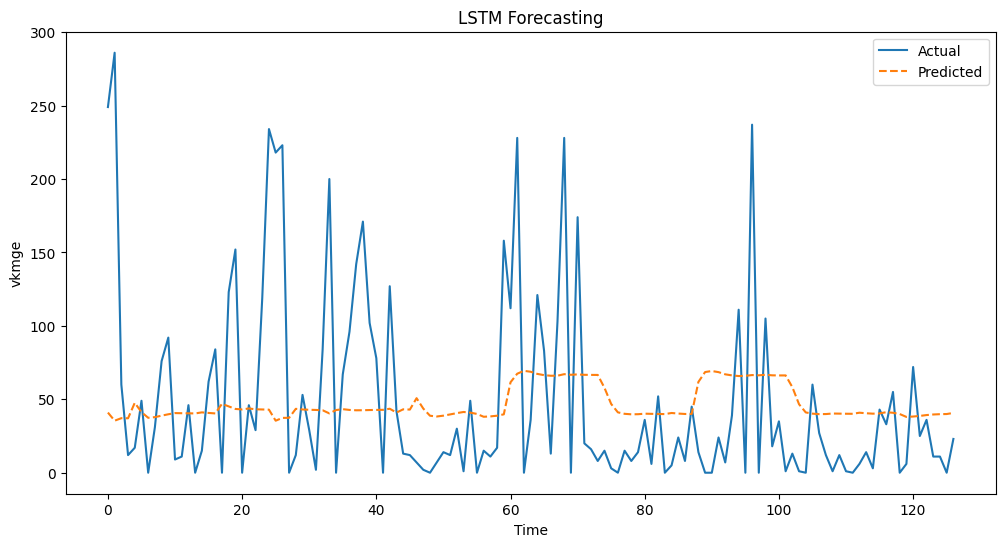

In [38]:
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

data_dl = data_training.copy(deep = True)

train_size = int(0.8 * len(data_dl))
data_dl_train = data_dl.iloc[:train_size]
data_dl_test = data_dl.iloc[train_size:]
# Normalize the data
scaler_vkmge = MinMaxScaler(feature_range=(0, 1))
scaler_a = MinMaxScaler(feature_range=(0,1))
data_dl_train['vkmge'] = scaler_vkmge.fit_transform(data_dl_train[['vkmge']])
data_dl_train['a'] = scaler_a.fit_transform(data_dl_train[['a']])
data_dl_test['vkmge'] = scaler_vkmge.transform(data_dl_test[['vkmge']])
data_dl_test['a'] = scaler_a.transform(data_dl_test[['a']])
# Create Sequence from data set.
def create_sequences(data, seq_length):
    '''This function creates a sequence of samples as an input for the Deep Learning Model
    and returns the Sequence and Target as Array'''
    X, y = [], []
    for i in range(len(data) - seq_length):
        x_seq = data[i:i+seq_length,1::]
        y_seq = data[i+seq_length,0] # "vkmge" is the target variable
        X.append(x_seq)
        y.append(y_seq)
    return np.array(X), np.array(y)

sequence_length = 7  # Define the seasonality --> based on the time series decompostion results the seasonlity period is 7 days.

X, y = create_sequences(data_dl_train.values, sequence_length)

X_tensor_train = torch.tensor(X).float()
y_tensor_train = torch.tensor(y).float()

X_test, y_test = create_sequences(data_dl_test.values, sequence_length)

X_tensor_test = torch.tensor(X_test).float()
y_tensor_test = torch.tensor(y_test).float()

# DL (LSTM) model defenition 
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1, dropout=0):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.dropout = dropout
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # lstm_out, _ = self.lstm(x)
        # lstm_out = lstm_out[:, -1, :]
        # output = self.fc(lstm_out)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        output = self.fc(out[:, -1, :])
        return output

# model initialization -> the number of nodes in the hidden layer can be tuned.
input_size = X.shape[2]
hidden_size = 128
output_size = 1
num_layers = 1
dropout = 0.2 
model = LSTM(input_size, hidden_size, output_size, num_layers, dropout)

# Meas Squared Error as the loss function and ADAM as the optimizer are selected.
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

#############################Training Loop###########################################
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_tensor_train)
    loss = criterion(outputs, y_tensor_train)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Model Evaluation
model.eval()
with torch.no_grad():
    outputs = model(X_tensor_test)
    predicted = scaler_vkmge.inverse_transform(outputs.numpy().reshape(-1,1))
    actual = scaler_vkmge.inverse_transform(y_tensor_test.numpy().reshape(-1,1))
    
    
perform_eval = performance_eval(actual, predicted)
print("Evaluation Result:", perform_eval)
plt.figure(figsize=(12,6))
plt.plot(actual, label='Actual')
plt.plot(predicted, label='Predicted', linestyle='--')
plt.xlabel('Time')
plt.ylabel('vkmge')
plt.title('LSTM Forecasting')
plt.legend()
plt.show()

### LSTM by adding another LSTM layers

Epoch [10/100], Loss: 0.0183
Epoch [20/100], Loss: 0.0138
Epoch [30/100], Loss: 0.0145
Epoch [40/100], Loss: 0.0136
Epoch [50/100], Loss: 0.0136
Epoch [60/100], Loss: 0.0135
Epoch [70/100], Loss: 0.0135
Epoch [80/100], Loss: 0.0135
Epoch [90/100], Loss: 0.0135
Epoch [100/100], Loss: 0.0135
Evaluation Result: {'MSE': 4446.48, 'RMSE': 66.68, 'MAPE': 3.97}


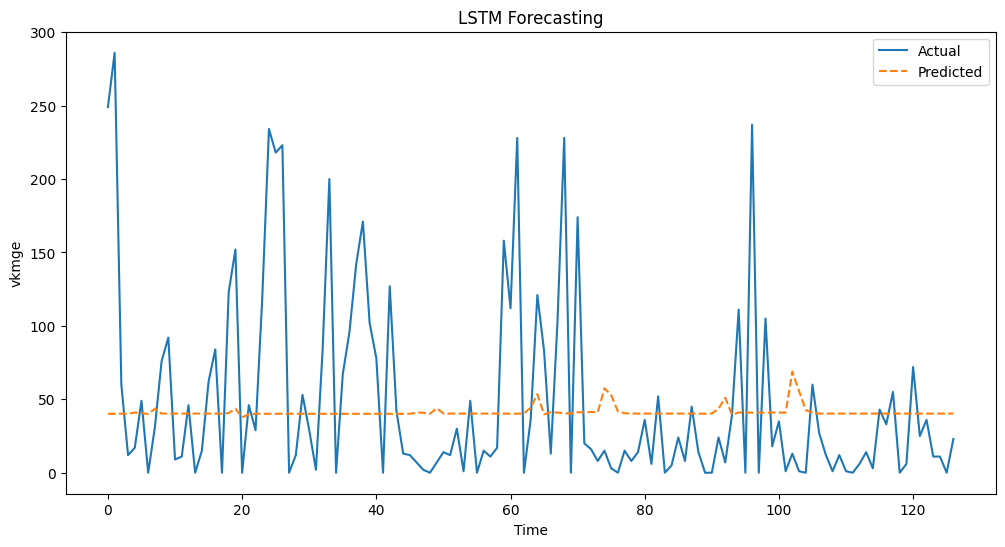

In [39]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import torch.autograd as autograd

# Enable anomaly detection
autograd.set_detect_anomaly(True)
data_dl = data_training.copy(deep = True)

train_size = int(0.8 * len(data_dl))
data_dl_train = data_dl.iloc[:train_size]
data_dl_test = data_dl.iloc[train_size:]
# Normalize the data
scaler_vkmge = MinMaxScaler(feature_range=(0, 1))
scaler_a = MinMaxScaler(feature_range=(0,1))
data_dl_train['vkmge'] = scaler_vkmge.fit_transform(data_dl_train[['vkmge']])
data_dl_train['a'] = scaler_a.fit_transform(data_dl_train[['a']])
data_dl_test['vkmge'] = scaler_vkmge.transform(data_dl_test[['vkmge']])
data_dl_test['a'] = scaler_a.transform(data_dl_test[['a']])
# Create Sequence from data set.
def create_sequences(data, seq_length):
    '''This function creates a sequence of samples as an input for the Deep Learning Model
    and returns the Sequence and Target as Array'''
    X, y = [], []
    for i in range(len(data) - seq_length):
        x_seq = data[i:i+seq_length,1::]
        y_seq = data[i+seq_length,0] # "vkmge" is the target variable
        X.append(x_seq)
        y.append(y_seq)
    return np.array(X), np.array(y)

sequence_length = 7  # Define the seasonality --> based on the time series decompostion results the seasonlity period is 7 days.

X, y = create_sequences(data_dl_train.values, sequence_length)

X_tensor_train = torch.tensor(X).float()
y_tensor_train = torch.tensor(y).float()

X_test, y_test = create_sequences(data_dl_test.values, sequence_length)

X_tensor_test = torch.tensor(X_test).float()
y_tensor_test = torch.tensor(y_test).float()

# DL (LSTM) model defenition 
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=2, dropout=0):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.dropout = dropout
        self.lstm_layers = nn.ModuleList([nn.LSTM(input_size, hidden_size, batch_first=True)] + 
                                         [nn.LSTM(hidden_size, hidden_size, batch_first=True) for _ in range(num_layers-1)])
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        #hiddens = []
        h = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out_tmp = x.clone()
        h_temp = h[0].clone()
        c_temp = c[0].clone()
        for i, layer in enumerate(self.lstm_layers):
            out, (h[i], c[i]) = layer(out_tmp, (h_temp.unsqueeze(0), c_temp.unsqueeze(0)))
            out_tmp = out.clone()
            h_temp =h[i].clone()
            c_temp = c[i].clone()

            #out, (h[i], c[i]) = layer(out, (h[i], c[i]))
            #out = self.fc(out[:, -1, :])
        out = self.fc(out[:, -1, :])
        return out

# model initialization -> the number of nodes in the hidden layer can be tuned.
input_size = X.shape[2]
hidden_size = 64
output_size = 1
num_layers = 4
dropout = 0.4
model = LSTM(input_size, hidden_size, output_size, num_layers, dropout)

# Meas Squared Error as the loss function and ADAM as the optimizer are selected.
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.08)

#############################Training Loop###########################################
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_tensor_train)
    loss = criterion(outputs, y_tensor_train)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Model Evaluation
model.eval()
with torch.no_grad():
    outputs = model(X_tensor_test)
    predicted = scaler_vkmge.inverse_transform(outputs.numpy().reshape(-1,1))
    actual = scaler_vkmge.inverse_transform(y_tensor_test.numpy().reshape(-1,1))

perform_eval = performance_eval(actual, predicted)
print("Evaluation Result:", perform_eval)
plt.figure(figsize=(12,6))
plt.plot(actual, label='Actual')
plt.plot(predicted, label='Predicted', linestyle='--')
plt.xlabel('Time')
plt.ylabel('vkmge')
plt.title('LSTM Forecasting')
plt.legend()
plt.show()

### Analysis Result:
Deep learning NN by defining a sequence of length of 7 by getting idea from seasonality of the inputs created in 2 version. The first version was a simple LSTM model with 1 lstm layer and one fully connected layer. I leverged drop out for regulation but the trained model can handle the flactuation of the output and estimates an approximately a constant number. in order to overcome under fitting I made the dl model deeper by adding 3 other lstm layers to it but no progress is observed.

## Forecasting Test set

In [69]:
data_test_submit = pd.read_csv("../data/external/test.csv")
data_test_submit['datum'] = pd.to_datetime(data_test_submit.datum)
data_test_submit.set_index("datum", inplace= True)
onehot_encoded = pd.get_dummies(data_test_submit["lt"]).astype(int)
data_test_submit = pd.concat([data_test_submit, onehot_encoded], axis =1)
data_test_submit.drop("lt",axis=1, inplace =True)
data_submit = missing_indication_imputation(data_test_submit,feats)
data_submit = pd.concat([data_training.tail(7),data_submit])
for i in range(1, sequence_length + 1):
    #data_ml[f'lag_{i}'] = data_ml['vkmge'].shift(i) -> data leakage
    data_submit[f'lag_a{i}'] = data_submit['a'].shift(i)
data_submit.drop("A",axis= 1, inplace=True)
x_submit = data_submit.drop("vkmge",axis=1)
y_submit = xgb_reg.predict(x_submit[x_submit.index > pd.to_datetime("2019-12-02")])


<Axes: xlabel='datum'>

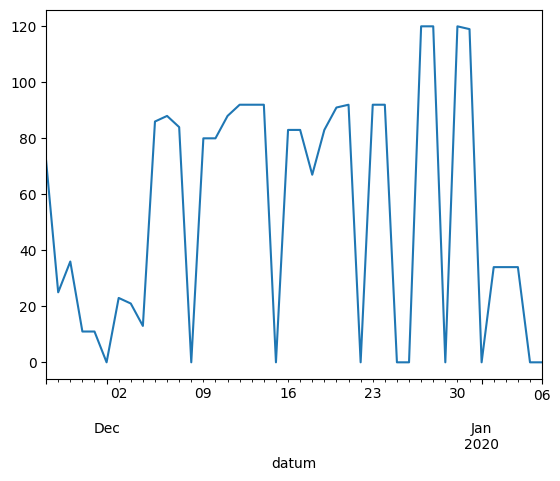

In [70]:
##### postprocessing
data_submit.loc[x_submit.index > pd.to_datetime("2019-12-02"),"vkmge"] = y_submit
data_submit["vkmge"] = data_submit["vkmge"].apply(lambda x: round(x))
data_submit.loc[data_submit["N"] == 1,"vkmge"] = 0
data_submit["vkmge"].plot()